In [1]:
## Coreset - Minimum Enclosing Ball
## Karan Vombatkere, Dec 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
class Coreset_MinimumEnclosingBall:
    """
    Class to compute Minimum Enclosing Ball Coreset
    Parameters
    ----------
        x_arr : numpy array data from Coreset_Util - must be R^2
        epsilon : epsilon value
    ----------
    Reference: Chapter 12, Data Stream Algorithms Lecture Notes, Amit Chakrabarti
    """
    
    #Initialize with parameters
    def __init__(self, x_arr, epsilon):
        self.x_array = x_arr
        self.epsilon = epsilon


    #Compute theta grid for data
    def compute_thetaGrid(self):
        thetaVal = np.sqrt(self.epsilon)
        numAngles = int((2*np.pi)/(thetaVal)) + 1
        
        self.thetaAngles = []
        self.angleSize = (2*np.pi/numAngles)

        for i in range(numAngles):
            angle_i = self.angleSize*i
            y_val = np.tan(angle_i)
            x_val = 1

            if (np.pi/2) <= angle_i <= (3*np.pi/2):
                x_val = -x_val
                y_val = -y_val

            self.thetaAngles.append([x_val, y_val])

        return


    #Function to compute angle between two vetors
    def vector_angle(self, u, v):
        dotProduct = np.dot(u,v)
        l2_normProduct = np.linalg.norm(u)*np.linalg.norm(v)
        angle = np.arccos(dotProduct/l2_normProduct)
        
        return angle


    #Function to compute argmin angle between a vector and x_array
    def compute_mebAngle_vector(self, vec):
        maxProduct = 0
        mebVec = []
        for u in self.x_array:
            dotProduct = np.dot(u,vec)
            vec_angle = self.vector_angle(u, vec)

            #Consider point only along direction of vec
            if vec_angle <= self.angleSize:
                if dotProduct >= maxProduct:
                    mebVec = u
                    maxProduct = dotProduct

        return mebVec

    #Function to plot MEB and x_array
    def plot2D_meb(self, meb_vec):
        x_plt = [vec[0] for vec in self.x_array]
        y_plt = [vec[1] for vec in self.x_array]

        # max_val = max(y) + int(0.1*max(x))
        # min_val = min(x) - int(0.1*min(x))

        plt.scatter(x_plt, y_plt, s= 0.05)

        meb_x = [vec[0] for vec in meb_vec]
        meb_y = [vec[1] for vec in meb_vec]

        plt.scatter(meb_x, meb_y, marker = '+')


        title_text = 'Minimum Enclosing Ball plot'
        plt.title(title_text, fontsize=11)
        plt.ylabel('y')
        plt.xlabel('x')
        #plt.legend(loc='upper right')
        plt.show()

        return None

    #Compute Minimum Enclosing ball
    def compute_minimumEnclosingBall(self):
        meb_vector = []

        #Compute theta grid
        self.compute_thetaGrid()

        for vec_i in self.thetaAngles:
            mebVec_i = self.compute_mebAngle_vector(vec_i)
            meb_vector.append(mebVec_i)

        return meb_vector

In [78]:
#Test data
x_arr = []
for i in range(1000):
    x_val, y_val = np.random.randint(-100,101), np.random.randint(-100,101)
    x_arr.append([x_val, y_val])

eps = 0.05


In [79]:
meb_test = Coreset_MinimumEnclosingBall(x_arr, eps)
v = meb_test.compute_minimumEnclosingBall()

In [80]:
v

[[100, 14],
 [96, 52],
 [98, 86],
 [100, 98],
 [100, 98],
 [100, 98],
 [63, 99],
 [8, 100],
 [-51, 100],
 [-79, 96],
 [-94, 96],
 [-94, 96],
 [-98, 90],
 [-100, 76],
 [-100, 29],
 [-100, -44],
 [-97, -59],
 [-98, -99],
 [-98, -99],
 [-98, -99],
 [-67, -100],
 [-25, -100],
 [33, -100],
 [60, -98],
 [96, -99],
 [96, -99],
 [96, -99],
 [95, -85],
 [97, -53]]

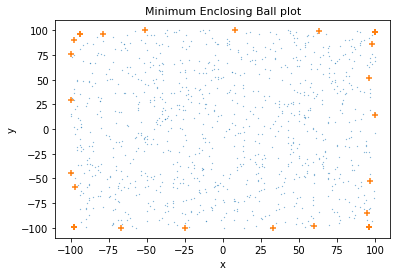

In [81]:
meb_test.plot2D_meb(v)